In [13]:
from cascadoc import Mesh, Solver, HypProblem, solve_oc
import numpy as np
from time import time
import matplotlib.pyplot as plt

In [14]:
G11_true = lambda t: - 4*np.cos(t) / (np.cos(t)-4*np.sin(t))
G22_true = lambda t: - (np.sin(t)) / (np.cos(t) - 4* np.sin(t))

x0 = lambda s: 0
y0 = lambda s: (3*s+1)/(2*(s+1))

x_an = lambda s, t: 2*(s**2+1)*np.sin(t)
y_an = lambda s, t: (3*s+1)/(2*(s+1))*np.cos(t)
T = [0, 0.2]
S = [0, 1]
C = [1,2]
# C = [2.3,0.9]

B11 = lambda s, t: -2*s
B12 = lambda s, t: 4/3*s**2
B21 = lambda s, t: - (3*s+1)/(4*(s**2+1)*(s+1))
B22 = lambda s, t: 4/((s+1)*(3*s+1))

G11 = lambda t: - 4*np.cos(t) / (np.cos(t)-4*np.sin(t))
G12 = lambda t: - G11(t)
G21_ = lambda t: (np.sin(t)) / (np.cos(t) - 4* np.sin(t))
G21 = lambda t: G21_(t) - 1
G22 = lambda t: - G21(t)

F1 = lambda s, t: 4*s**3*np.sin(t)+2*np.cos(t)+4*s**2*np.cos(t)/(3*(s+1))
F2 = lambda s, t: 0

phi_dx = lambda s, x, y : -2*(x - x_an(s, T[1])) 
phi_dy = lambda s, x, y : -2*(y - y_an(s, T[1]))

hyp_problem = HypProblem(T=T, S=S, C=C, B=[[B11, B12], [B21, B22]], 
                         F=[F1, F2], G=[[G11, G12], [G21, G22]], 
                         X0=x0, Y0=y0, phi_dx=phi_dx, phi_dy=phi_dy)

mesh = Mesh(hyp_problem, 100)
solver = Solver()
solver.solve_initial(mesh, hyp_problem)
solver.solver_center(mesh, hyp_problem)
solver.solver_final(mesh, hyp_problem)

In [15]:
# Первое приближение ===============================================
# uk_0 = np.random.random(len(t_h))
G22_0 = lambda t: G22_true(t)+1
# G22_0 = lambda t: G22_true(t)
G21_0 = lambda t:  - G22_0(t)
hyp_problem.set_G([[G11, G12], [G21_0, G22_0]])

solver.solve_initial(mesh, hyp_problem)
solver.solver_center(mesh, hyp_problem)
solver.solver_final(mesh, hyp_problem)

In [16]:
def plot_mesh():
    plt.figure(figsize=(12,6))
    
    plt.subplot(3, 2, 1)
    mesh.plot_border(border_type='final', fun='x', style='r.')
    mesh.plot_border(border_type='final', fun=lambda si: x_an(si, T[1]), style="b-", fun_name='x_an')
    
    plt.subplot(3, 2, 3)
    mesh.plot_border(border_type='final', fun='y', style='r.')
    mesh.plot_border(border_type='final', fun=lambda si: y_an(si, T[1]), style="b-", fun_name='y_an')
    
    plt.subplot(3, 2, 2)
    mesh.plot_border(border_type='left', fun='x', style='r.')
    mesh.plot_border(border_type='left', fun=lambda ti: x_an(S[0], ti), style="b-", fun_name='x_an')
    
    plt.subplot(3, 2, 4)
    mesh.plot_border(border_type='left', fun='y', style='r.')
    mesh.plot_border(border_type='left', fun=lambda ti: y_an(S[0], ti), style="b-", fun_name='y_an')
    
    plt.subplot(3, 2, 6)
    mesh.plot_border(border_type='left', fun=lambda ti: G22_true(ti), style='r.', fun_name='v_an')
    mesh.plot_border(border_type='left', fun=lambda ti: hyp_problem.G22(ti), style='b-', fun_name='v')


In [17]:
def plot_mesh():
    plt.figure(figsize=(12,6))
    
    plt.subplot(3, 2, 1)
    mesh.plot_border(border_type='final', fun='x', style='r.')
    mesh.plot_border(border_type='final', fun=lambda si: x_an(si, T[1]), style="b-", fun_name='x_an')
    
    plt.subplot(3, 2, 3)
    mesh.plot_border(border_type='final', fun='y', style='r.')
    mesh.plot_border(border_type='final', fun=lambda si: y_an(si, T[1]), style="b-", fun_name='y_an')
    
    plt.subplot(3, 2, 2)
    mesh.plot_border(border_type='left', fun='x', style='r.')
    mesh.plot_border(border_type='left', fun=lambda ti: x_an(S[0], ti), style="b-", fun_name='x_an')
    
    plt.subplot(3, 2, 4)
    mesh.plot_border(border_type='left', fun='y', style='r.')
    mesh.plot_border(border_type='left', fun=lambda ti: y_an(S[0], ti), style="b-", fun_name='y_an')
    
    plt.subplot(3, 2, 6)
    mesh.plot_border(border_type='left', fun=lambda ti: G22_true(ti), style='b-', fun_name='v_an')
    mesh.plot_border(border_type='left', fun=lambda ti: hyp_problem.G22(ti), style='r.', fun_name='v')

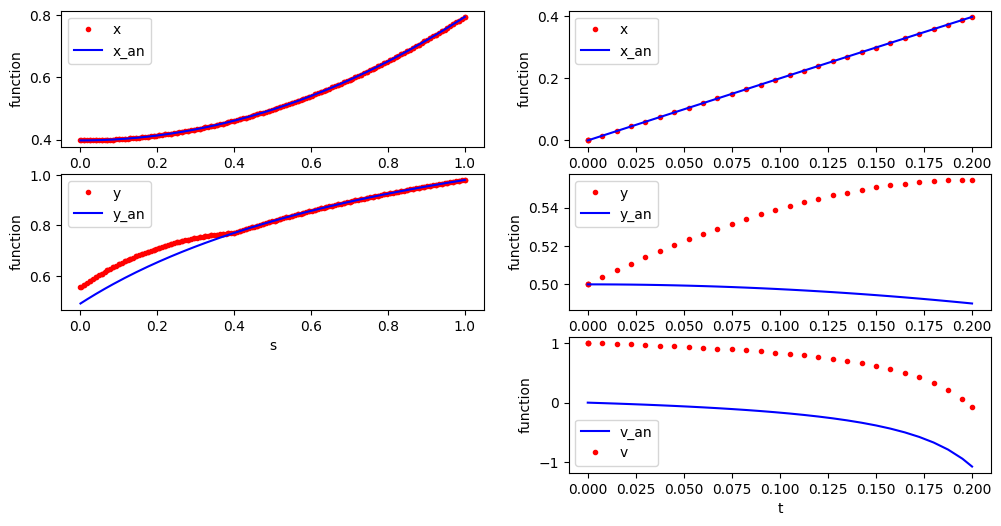

In [18]:
plot_mesh()


In [19]:
# ["mpm", "cgm", "impm"]
U0 = lambda t: G22(t)
xs = lambda s: x_an(s, T[1])
ys = lambda s: y_an(s, T[1])
start_time = time()
rez = solve_oc(hyp_problem, mesh, U0, xs, ys, u_lim=[-2.5, 1],  method= "cgm",
               eps=0.00001, 
               beta = 0.0, 
               delta = 1.0, 
               eps_count_max=6,
               debug=True)
print(f"сек:{time()-start_time:.2f}")

Не оптимально
Невязка составляет: 0.007026
****************************************
результат минимизации a =  0.3225806451612903
Не оптимально
Невязка составляет: 0.000224
****************************************
результат минимизации a =  0.19230769230769232
Не оптимально
Невязка составляет: 0.000635
****************************************
результат минимизации a =  0.136986301369863
Не оптимально
Невязка составляет: 0.000534
****************************************
результат минимизации a =  0.13513513513513514
Не оптимально
Невязка составляет: 0.000086
****************************************
результат минимизации a =  0.10526315789473684
Не оптимально
Невязка составляет: 0.000376
****************************************
результат минимизации a =  0.08620689655172414
Не оптимально
Невязка составляет: 0.000313
****************************************
результат минимизации a =  0.08547008547008547
Не оптимально
Невязка составляет: 0.000065
****************************************
ре

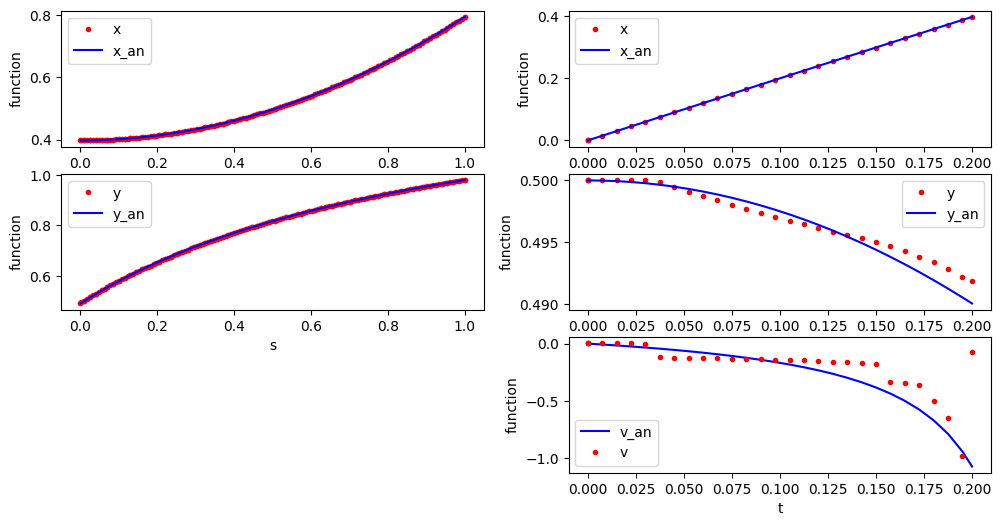

In [20]:
plot_mesh()